In [1]:
# imports
import numpy as np

from commstools import set_backend
from commstools.channel import add_gaussian_noise
from commstools.filtering import rrc_taps
from commstools.plotting import filter_response, ideal_constellation
from commstools.baseband import qam

set_backend("gpu")


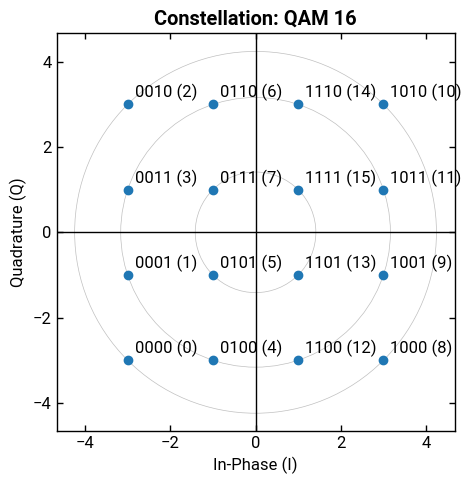

In [2]:
ideal_constellation(modulation="qam", order=16, show=True)


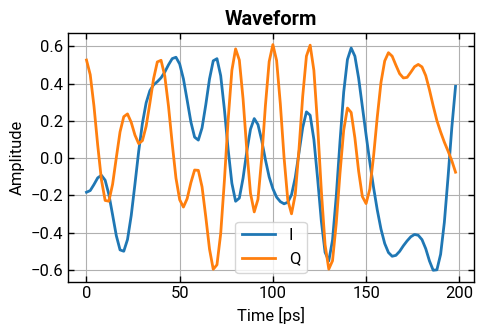

In [18]:
symbol_rate = 100e9
sampling_rate = 500e9
sps = int(sampling_rate / symbol_rate)

sig_4qam = qam(
    order=16,
    num_symbols=100_000,
    sps=sps,
    symbol_rate=symbol_rate,
    pulse_shape="rrc",
    seed=42,
)
sig_4qam.plot_symbols(num_symbols=20, show=True)


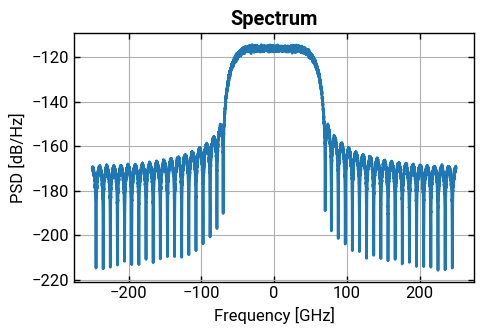

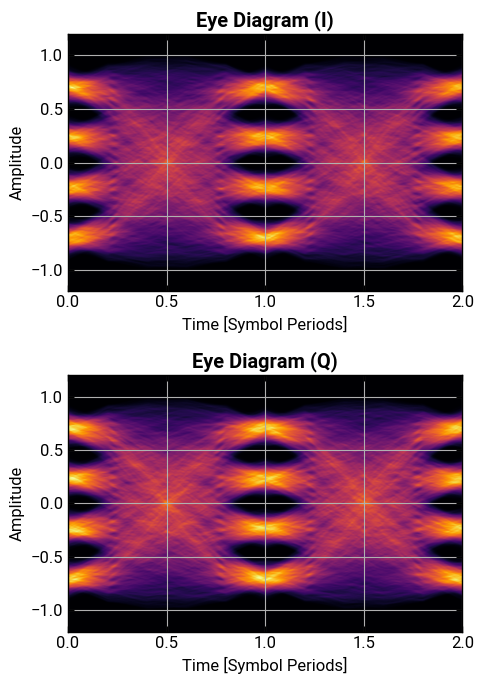

In [19]:
sig_4qam.plot_psd(show=True, nperseg=2**14)
sig_4qam.plot_eye(show=True)


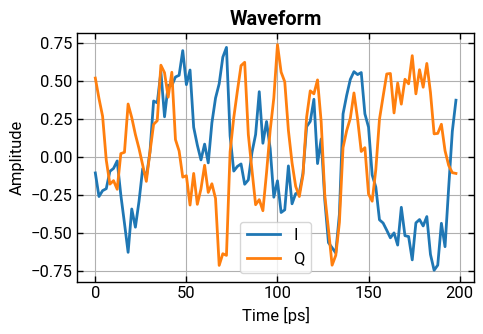

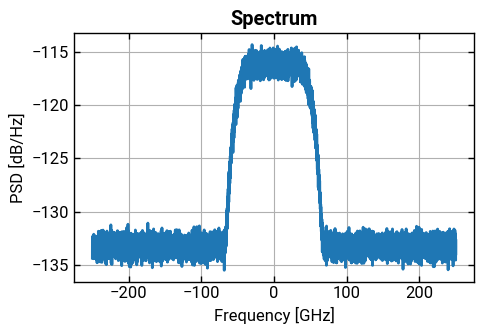

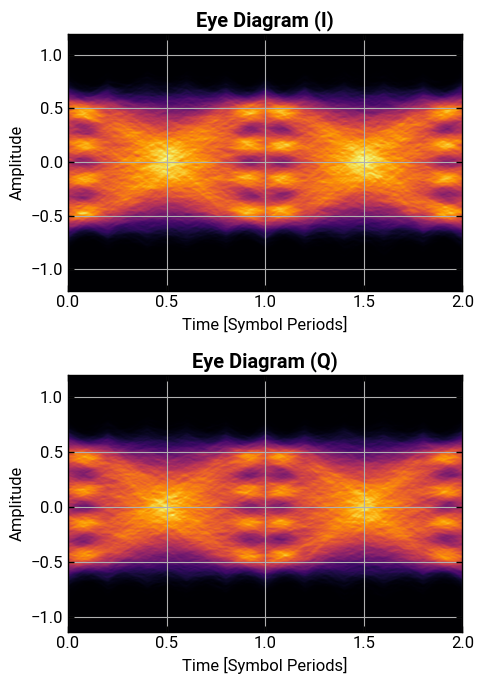

In [20]:
sig_4qam_n = add_gaussian_noise(sig_4qam, snr_db=10)
sig_4qam_n.plot_symbols(num_symbols=20, show=True)
sig_4qam_n.plot_psd(show=True, nperseg=2**14)
sig_4qam_n.plot_eye(show=True)


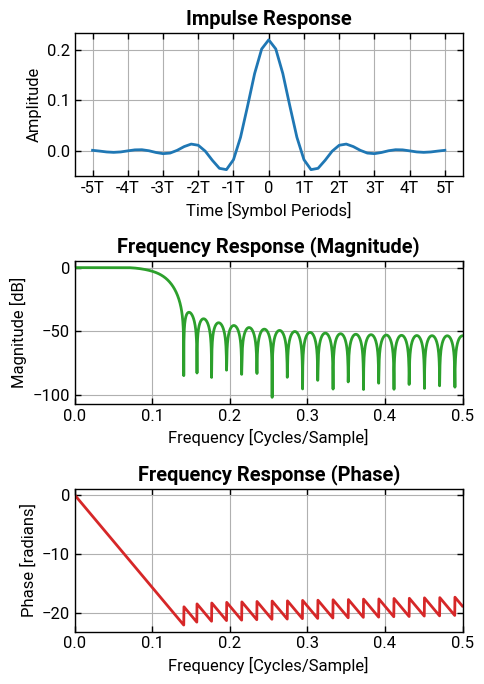

In [21]:
rrc_filter = rrc_taps(sps=sps, rolloff=0.35, span=10)
filter_response(rrc_filter, sps=sps, show=True)


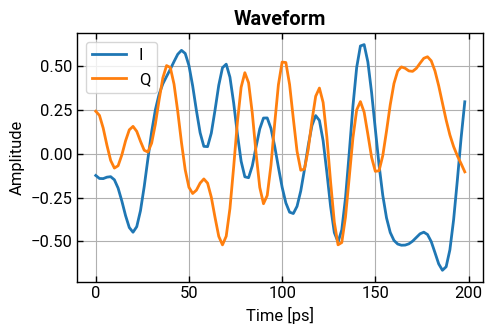

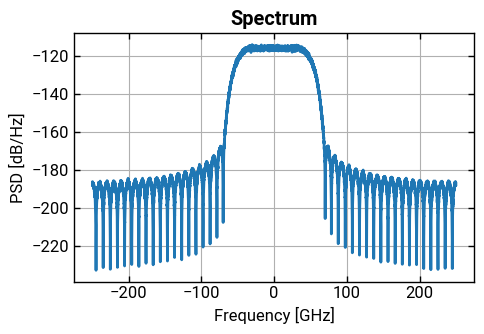

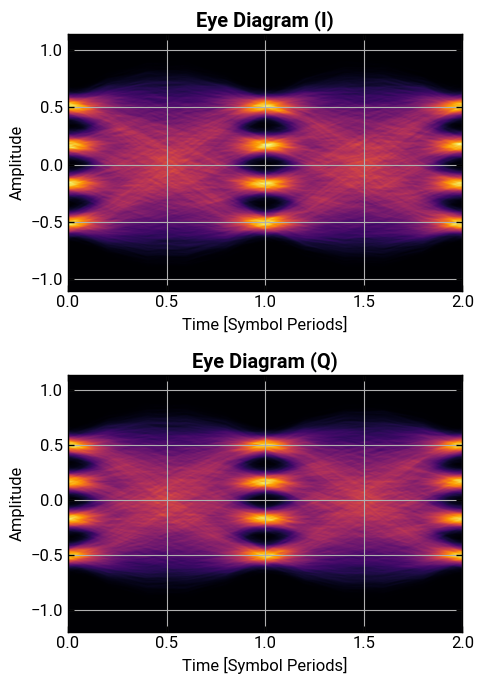

In [22]:
sig_4qam_n.matched_filter(pulse_taps=rrc_filter)
sig_4qam_n.plot_symbols(num_symbols=20, show=True)
sig_4qam_n.plot_psd(show=True, nperseg=2**14)
sig_4qam_n.plot_eye(show=True)


In [29]:
sig_tmp = sig_4qam.copy()
sig_tmp.spectral_domain = "passband"
sig_tmp.domain = "OPT"
sig_tmp.center_frequency = 193.4144e12


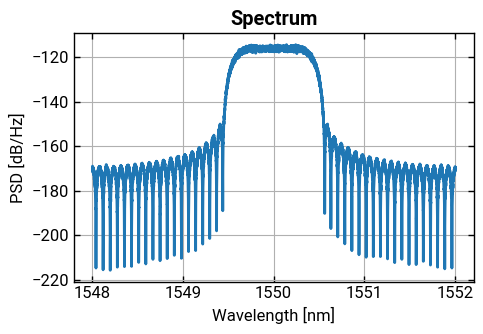

In [30]:
sig_tmp.plot_psd(show=True, x_axis="wavelength", nperseg=2**14)
